In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def analysis_graph(path):

    G = nx.read_edgelist(path, comments='#', nodetype=int)

    num_edges = len(G.edges)
    print('num_edges = ',num_edges)
    num_nodes = len(G.nodes)
    print('num_nodes = ',num_nodes)
    average_degree = (num_edges * 2) / num_nodes
    print('average_degree = ',average_degree)
    density = nx.density(G)
    print('density = ',density)

    avg_clustering = nx.average_clustering(G)
    print('avg_clustering = ',avg_clustering)
    transivity = nx.transitivity(G)
    print('transivity = ',transivity)
    assortativity = nx.degree_assortativity_coefficient(G)
    print('assortativity = ',assortativity)

    
    # calculate degree centrality
    degree_centrality = nx.degree_centrality(G)
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print('top_degree = ',top_degree)


    # calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print('top_betweenness = ',top_betweenness)

    # calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print('top_closeness = ',top_closeness)

    # calculate PageRank centrality
    pagerank_centrality = nx.pagerank(G)
    top_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print('top_pagerank = ',top_pagerank)

    if nx.is_connected(G) :
        if len(G.nodes) < 5000 :
            diameter = nx.diameter(G)
            print('diameter = ',diameter)
            average_shortest_path_length = nx.average_shortest_path_length(G)
            print('average_shortest_path_length =',average_shortest_path_length )
        else :
            diameter= nx.algorithms.approximation.diameter(G)
            print('proximated diameter = ',diameter)
            print('average_shortest_path_length = unknown(takes too long to get)' )


    else:
        largest_cc = max(nx.connected_components(G), key=len)
        G_cc = G.subgraph(largest_cc)
        if len(G_cc.nodes) < 5000 :
            diameter = nx.diameter(G_cc)
            print('diameter = ',diameter)
            average_shortest_path_length = nx.average_shortest_path_length(G_cc)
            print('average_shortest_path_length =',average_shortest_path_length )
        else :
            diameter= nx.algorithms.approximation.diameter(G_cc)
            print('proximated diameter = ',diameter)
            print('average_shortest_path_length = unknown(takes too long to get)' )
    
    # calculate degree distribution
    degree_dist = sorted([d for n, d in G.degree()],reverse=True)
    sns.histplot(degree_dist,kde=True)

num_edges =  88234
num_nodes =  4039
average_degree =  43.69101262688784
density =  0.010819963503439287
avg_clustering =  0.6055467186200876
transivity =  0.5191742775433075
assortativity =  0.06357722918564943
top_degree =  [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354)]
top_betweenness =  [(107, 0.4805180785560152), (1684, 0.3377974497301992), (3437, 0.23611535735892905), (1912, 0.2292953395868782), (1085, 0.14901509211665306)]
top_closeness =  [(107, 0.45969945355191255), (58, 0.3974018305284913), (428, 0.3948371956585509), (563, 0.3939127889961955), (1684, 0.39360561458231796)]
top_pagerank =  [(3437, 0.0076145868447496), (107, 0.006936420955866117), (1684, 0.006367162138306824), (0, 0.006289602618466542), (1912, 0.003876971600884498)]
diameter =  8
average_shortest_path_length = 3.6925068496963913


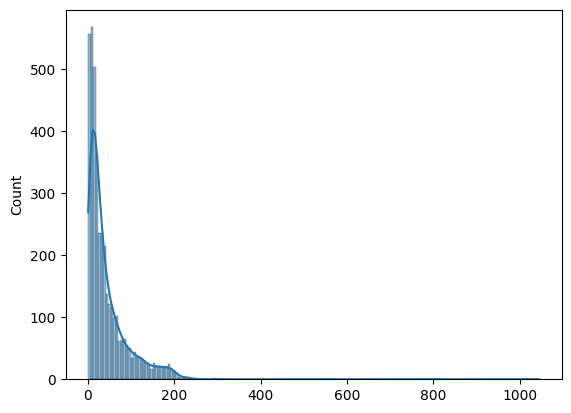

In [3]:
path = 'datasets\\facebook_combined.txt'
analysis_graph(path)